In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import igc_tools
import math_utils
import datetime as dt

%load_ext autoreload
%autoreload 2

# ICG Review Tools
##### Rob Barlow, 2024-06

#### IGC Loading

In [2]:
IGC_file = "dunlap-04-19/Alex Honda.696.7.igc"
flight_log = igc_tools.IGCLog(IGC_file)

#### KML Export

In [3]:
# flight_log.export_tracks("potato")

#### Dataframe Access

In [4]:
for col in flight_log.dataframe.columns:
    print(col)

time
time_iso
lat
lon
fix_validity
pressure_altitude_m
gnss_altitude_m
time_pandas
gnss_altitude_m_delta_1s
seconds_delta_1s
vertical_speed_ms_1s
prev_lat
prev_lon
distance_traveled_m_1s
speed_ms_1s
speed_kmh_1s
gnss_altitude_m_delta_5s
seconds_delta_5s
vertical_speed_ms_5s
distance_traveled_m_5s
speed_ms_5s
speed_kmh_5s
gnss_altitude_m_delta_20s
seconds_delta_20s
vertical_speed_ms_20s
distance_traveled_m_20s
speed_ms_20s
speed_kmh_20s
gnss_altitude_m_delta_30s
seconds_delta_30s
vertical_speed_ms_30s
distance_traveled_m_30s
speed_ms_30s
speed_kmh_30s
stopped_to_climb
on_glide
climbing
sinking
stopped_and_not_climbing
stopped_and_climbing
climbing_on_glide
sinking_on_glide
category
stopped_and_not_climbing_s
stopped_and_climbing_s
climbing_on_glide_s
sinking_on_glide_s
glide
altitude_loss_m
total_meters_climbed
total_meters_lost
time_climbing_s
time_gliding_s
cumulative_time_climbing_s
cumulative_time_gliding_s
climb_rate_avg
lon_wm
lat_wm


#### Example Plots

In [ ]:
# Create subplots with secondary y-axes
fig = make_subplots(
    rows=4, cols=1,
    subplot_titles=("Altitude & Climb Rate", "Speed", "Regime", "Time in Regime"),
    specs=[[{"secondary_y": True}], [{"secondary_y": True}], [{"secondary_y": True}], [{"secondary_y": False}]],
    vertical_spacing=0.1,
    shared_xaxes=True
)

# Plot 1: Altitude with climb rate overlay
fig.add_trace(
    go.Scatter(x=flight_log.dataframe["time_pandas"], 
               y=flight_log.dataframe["gnss_altitude_m"],
               name="GNSS Altitude",
               line=dict(color='blue'),
               legendgroup='group1',
               legend='legend1'),
    row=1, col=1, secondary_y=False
)

fig.add_trace(
    go.Scatter(x=flight_log.dataframe["time_pandas"], 
               y=flight_log.dataframe["climb_rate_avg"],
               name="Climb Rate Avg",
               line=dict(color='red'),
               legendgroup='group1',
               legend='legend1'),
    row=1, col=1, secondary_y=True
)

# Stopped to climb shaded area
fig.add_trace(
    go.Scatter(x=flight_log.dataframe["time_pandas"], 
               y=flight_log.dataframe["climbing"] * 5,
               fill='tozeroy',
               name="Climbing",
               line=dict(width=0),
               fillcolor='rgba(0, 255, 0, 0.3)',
               legendgroup='group1',
               legend='legend1'),
    row=1, col=1, secondary_y=True
)

# Plot 2: Speed
fig.add_trace(
    go.Scatter(x=flight_log.dataframe["time_pandas"], 
               y=flight_log.dataframe["speed_kmh_20s"],
               name="Speed",
               line=dict(color='green'),
               legendgroup='group2',
               legend='legend2'),
    row=2, col=1, secondary_y=False
)

fig.add_trace(
    go.Scatter(x=flight_log.dataframe["time_pandas"], 
               y=flight_log.dataframe["stopped_to_climb"],
               fill='tozeroy',
               name="Stopped to Climb",
               line=dict(width=0),
               fillcolor='rgba(255, 0, 0, 0.3)',
               legendgroup='group2',
               legend='legend2'),
    row=2, col=1, secondary_y=True
)

# Plot 3: Regime
fig.add_trace(
    go.Scatter(x=flight_log.dataframe["time_pandas"], 
               y=flight_log.dataframe["category"],
               name="Category",
               line=dict(color='blue'),
               legendgroup='group3',
               legend='legend3'),
    row=3, col=1,
)

# Plot 4: Time in Regime
fig.add_trace(
    go.Scatter(x=flight_log.dataframe["time_pandas"], 
               y=flight_log.dataframe["stopped_and_not_climbing_s"],
               name="Stopped and Not Climbing",
               line=dict(color='red'),
               legendgroup='group4',
               legend='legend4'),
    row=4, col=1
)

fig.add_trace(
    go.Scatter(x=flight_log.dataframe["time_pandas"], 
               y=flight_log.dataframe["stopped_and_climbing_s"],
               name="Stopped and Climbing",
               line=dict(color='orange'),
               legendgroup='group4',
               legend='legend4'),
    row=4, col=1
)

fig.add_trace(
    go.Scatter(x=flight_log.dataframe["time_pandas"], 
               y=flight_log.dataframe["climbing_on_glide_s"],
               name="Climbing on Glide",
               line=dict(color='green'),
               legendgroup='group4',
               legend='legend4'),
    row=4, col=1
)

fig.add_trace(
    go.Scatter(x=flight_log.dataframe["time_pandas"], 
               y=flight_log.dataframe["sinking_on_glide_s"],
               name="Sinking on Glide",
               line=dict(color='gold'),
               legendgroup='group4',
               legend='legend4'),
    row=4, col=1
)


# Update layout with multiple legends positioned for each subplot
fig.update_layout(
    height=1200,
    width=1400,
    hovermode='x unified',
    
    # Legend 1 - positioned near top subplot
    legend1=dict(
        x=1.02,
        y=1.0,
        xanchor='left',
        yanchor='top',
        bgcolor='rgba(255, 255, 255, 0.8)',
        bordercolor='black',
        borderwidth=1
    ),
    
    # Legend 2 - positioned near second subplot
    legend2=dict(
        x=1.02,
        y=0.72,
        xanchor='left',
        yanchor='top',
        bgcolor='rgba(255, 255, 255, 0.8)',
        bordercolor='black',
        borderwidth=1
    ),
    
    # Legend 3 - positioned near third subplot
    legend3=dict(
        x=1.02,
        y=0.45,
        xanchor='left',
        yanchor='top',
        bgcolor='rgba(255, 255, 255, 0.8)',
        bordercolor='black',
        borderwidth=1
    ),
    
    # Legend 4 - positioned near bottom subplot
    legend4=dict(
        x=1.02,
        y=0.18,
        xanchor='left',
        yanchor='top',
        bgcolor='rgba(255, 255, 255, 0.8)',
        bordercolor='black',
        borderwidth=1
    )
)

# Update y-axes labels
fig.update_yaxes(title_text="Altitude (m)", row=1, col=1, secondary_y=False)
fig.update_yaxes(title_text="Climb Rate (m/s)", row=1, col=1, secondary_y=True, range=[0, 5])
fig.update_yaxes(title_text="Speed (km/h)", row=2, col=1, secondary_y=False)
fig.update_yaxes(title_text="", row=2, col=1, secondary_y=True)
fig.update_yaxes(title_text="Category", row=3, col=1)
fig.update_yaxes(title_text="Time (s)", row=4, col=1)

# Update x-axes labels
fig.update_xaxes(title_text="Time", row=4, col=1)

# Optional: Set x-axis range
# left = dt.datetime(2025, 4, 19, 22, 30)
# right = dt.datetime(2025, 4, 19, 23)
# fig.update_xaxes(range=[left, right])

fig.show()

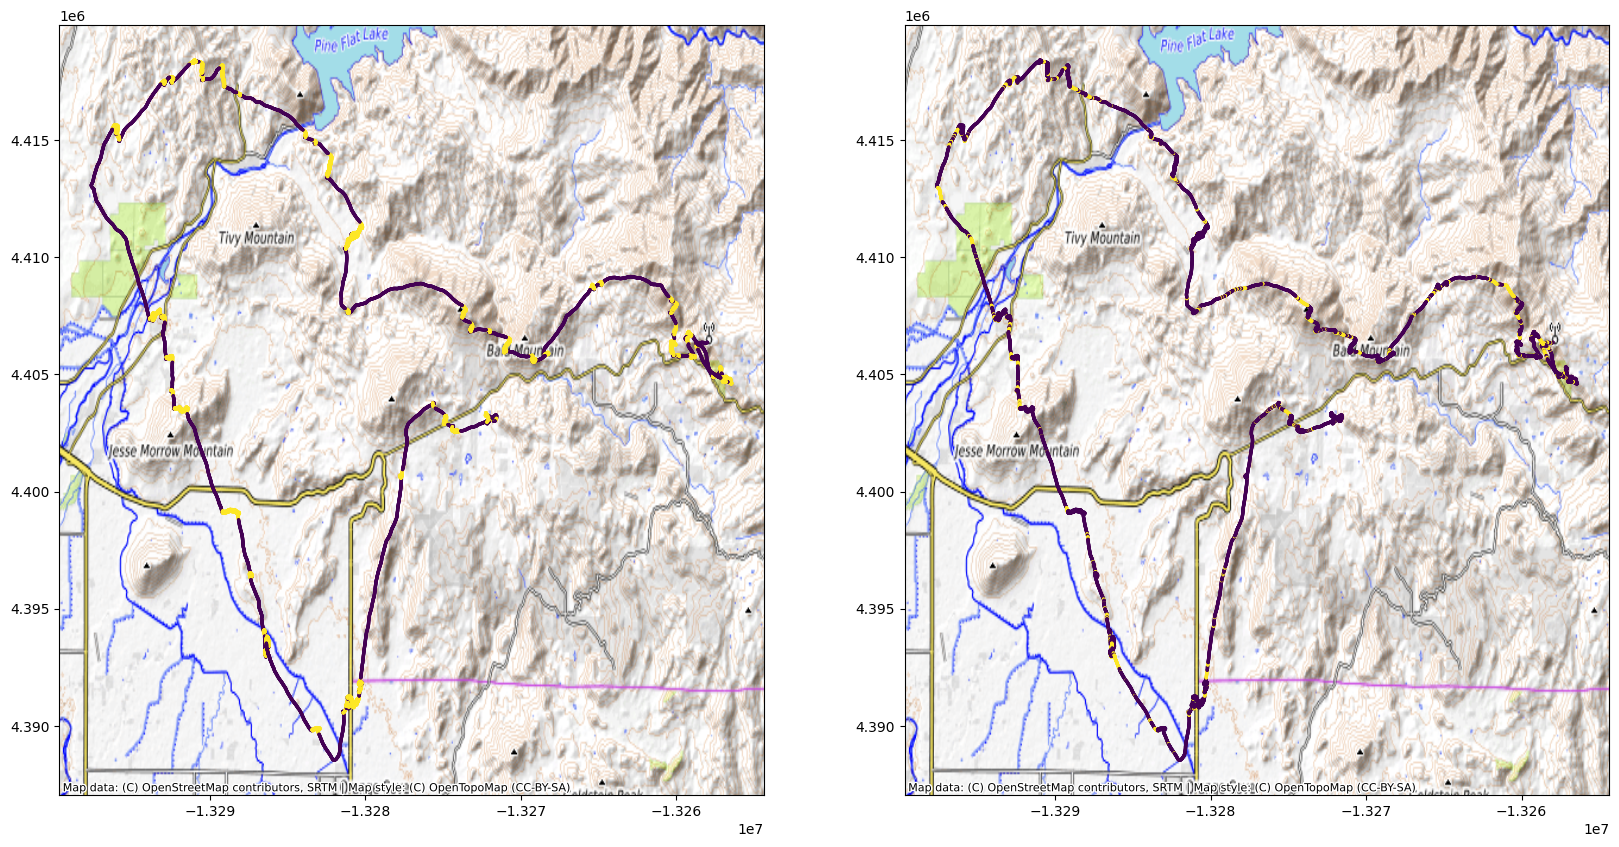

In [6]:
fig, axes = plt.subplots(1, 2,figsize = (20, 10))
ax1, ax2 = axes

ax1.scatter(flight_log.dataframe["lon_wm"], flight_log.dataframe["lat_wm"], c=flight_log.dataframe["stopped_to_climb"], s=2)
ax2.scatter(flight_log.dataframe["lon_wm"], flight_log.dataframe["lat_wm"], c=flight_log.dataframe["climbing_on_glide"], s=2)

for ax in axes: 
    ctx.add_basemap(ax, source=ctx.providers.OpenTopoMap)

